# 2020-06-10: Analyzing MS2 traces

I've decided to push forward and start analyzing MS2 traces from segmented movies. I think there are a number of additional things that need to be done with the segmentation pipeline. In particular, nuclear segmentation still sucks (ugh). I __*think*__ the biggest issue is the input to the watershed algorithm. I'd like to try some changes like: use a DoG input to initial thresholding, use an inverting of the distance transform of the mask (inverting only the mask=1 values, leaving background pixels at 0) as the input to the watershed. 

But that's for another day. Nuclear segmentation is important but not immediately. The MS2 segmentation on its own works reasonably well so it seems fair to start making some traces and seeing what we can do.

In [2]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from importlib import reload
import pickle
import czifile
%matplotlib inline

# Import my packages.
import sys
sys.path.append('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/bin')
import imagep as imp

I found a section of this movie that has a bunch of spots and seems to last for a while. Seems like a good place to start.

In [3]:
# Load image stack.
stack = imp.read_tiff_lattice(
    '/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/data/20171207_Zldeve_em1_mv2/', 
    span=(8,36))

TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781

TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781: coercing invalid ASCII to bytes
TiffTag 32781

In [4]:
reload(imp)
spot_data = imp.ms2_segment_stack(stack, np.ones_like(stack[0]), 0, h_stringency=1, xy_max_width=20)

AttributeError: module 'imagep' has no attribute 'ms2_segment_stack'

In [108]:
reload(imp)
s = {}
l=4
for n in spot_data:
    if (len(spot_data[n]) >= l):
        s[n]=spot_data[n]

v=imp.add_volume_mean(s, stack=stack, channel=0, ij_rad=4, z_rad=3, ij_scale=1, z_scale=1)

In [109]:
boxstack_0 = imp.box_spots(stack[0], s, halfwidth_xy=10,halfwidth_z=10)
imp.viewer(boxstack_0.max(axis=1),'txy')

interactive(children=(Dropdown(description='Color', index=8, options=('cividis', 'prism', 'plasma', 'gray_r', …

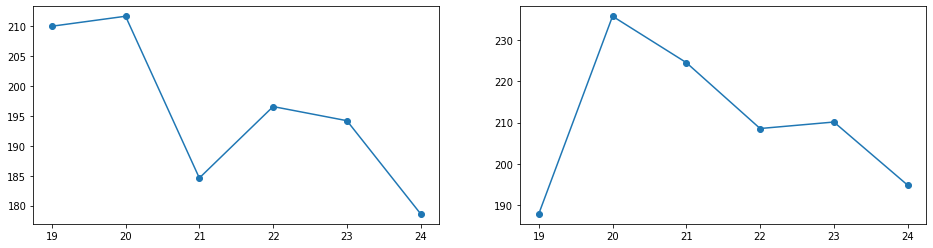

In [123]:
v4 = v[37]
ax = imp.qax(2)
ax[0].plot(v4[:,0], v4[:,5], marker="o")
ax[1].plot(v4[:,0], v4[:,9], marker="o")

In [119]:
v.keys()

dict_keys([4, 5, 7, 9, 11, 13, 14, 19, 20, 37, 38, 40])

In [2]:
c = czifile.imread('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/data/EVE_D11-14.czi')
c=np.squeeze(c)
c = np.swapaxes(c,0,1)

In [109]:
# Got to 8
reload(imp)
test=c[:,0:20]
a=imp.ms2_segment_stack(test[:-1], np.ones_like(test[0]), peak_window_size=(20,15,15), h_stringency=0, xy_max_width=10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [110]:
reload(imp)
b1=imp.box_spots(test[0], a, linewidth=2, halfwidth_xy=7)
#imp.viewer(b,'cxy')
imp.viewer(b1.max(axis=1),'txy',15)

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

In [111]:
good={}
x=1
for n in a:
    if (len(a[n]) >= 18):
        good[x] = a[n]
        x = x + 1
        
bad={}
x=1
for n in a:
    if (len(a[n]) < 4):
        bad[x] = a[n]
        x = x + 1

In [25]:
for n in bad:
    print(bad[n][:,5:9])

[[2082.60557879   12.35316147   10.42572085   13.9962529 ]]
[[1730.47922155   17.92165312   11.75421324    9.88695798]]
[[2120.38760308   10.7665107    12.59405952   10.06388613]]
[[2123.60796832    9.86224884   13.15928907   14.76275866]]
[[2476.06036847   11.18194827   14.26139006    9.82737038]]
[[2082.46401413   11.21649784   14.06330444   14.71950516]]
[[1865.16566871   13.5111228    13.83031003   12.87183578]]
[[2081.57615907   16.1062955    13.9617459    12.24293222]]
[[1931.43727575   14.41167854    9.68529049   14.63198871]]
[[2057.91931134   12.53308457   10.55093453   13.74113383]]
[[1884.9140191    14.69649425   14.08730961   10.31676273]]
[[1844.46934583   11.89683473   12.92315936   12.29476186]]
[[2015.96223453   13.92632226   14.91274359   13.26120936]]
[[1696.3219592    28.48841958   14.79825827    9.55956913]]
[[1818.31250558   15.24709221   12.54280205   11.86579992]]
[[2033.2620535     9.41817372    8.73665461    8.99583163]]
[[1794.6268829    41.8113967    12.12285

In [34]:
for n in good:
    print(good[n][:,5:9])

[[4.15299696e+04 1.11944431e+00 1.19572822e+00 1.44691912e+00]
 [3.22495660e+03 7.25985820e+00 6.70281893e+00 8.18163536e+00]
 [9.65221506e+03 3.68047751e+00 2.61989635e+00 2.80772021e+00]
 [1.06710070e+04 3.22748653e+00 2.62211981e+00 2.51143825e+00]]
[[3.29998022e+03 7.36887607e+00 5.21768699e+00 5.63370290e+00]
 [3.51550041e+03 7.47504120e+00 4.85815998e+00 4.60128034e+00]
 [2.84222788e+03 9.21922332e+00 6.32480603e+00 5.31987940e+00]
 [4.05732568e+03 6.75599144e+00 3.96923543e+00 4.07769235e+00]]
[[2.69202744e+04 1.29046449e+00 1.62789760e+00 1.30812369e+00]
 [7.70035469e+03 5.60792874e+00 2.83106039e+00 2.88499120e+00]
 [5.96613227e+03 5.12995898e+00 3.36905379e+00 3.14630368e+00]
 [3.61887265e+03 7.53655035e+00 4.75128246e+00 4.47153966e+00]]
[[3.74839557e+04 1.14051240e+00 1.15274769e+00 1.26451531e+00]
 [3.90800392e+04 1.08955977e+00 1.10770530e+00 1.14808350e+00]
 [4.08015732e+04 1.25102225e+00 1.07247957e+00 1.06500101e+00]
 [2.71981181e+04 1.52710106e+00 1.26140890e+00 1.214

In [12]:
len(good)

182

In [84]:
reload(imp)
b1=imp.box_spots(test[0], good, linewidth=2, halfwidth_xy=7, halfwidth_z=3)
#imp.viewer(b,'cxy')
imp.viewer(b1,'tzxy',15)

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

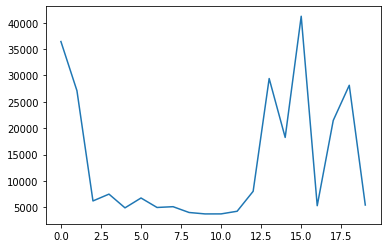

In [112]:
guy=good[8]
plt.plot(guy[:,0], guy[:,5])

In [114]:
good=imp.add_volume_mean(good, test, 0, 2,3)

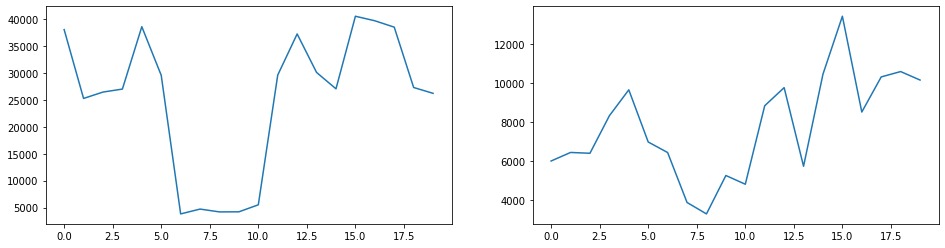

In [138]:
guy=good[12]
ax=imp.qax(2)
ax[0].plot(guy[:,0], guy[:,5])
ax[1].plot(guy[:,0], guy[:,9])

In [139]:
reload(imp)
here = {}
here[1] = good[12]
b=imp.box_spots(test[0], here, linewidth=2, halfwidth_xy=7, halfwidth_z=3)
#imp.viewer(b,'cxy')
imp.viewer(b.max(axis=1),'txy',15)

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

In [146]:
z,x,y = np.indices((2,2,2))
z

array([[[0, 0],
        [0, 0]],

       [[1, 1],
        [1, 1]]])

In [1]:
import fitting as fit
from fitting import gaussian3d

############################################################################
def add_gaussian_integration(spot_data, wlength_xy, wlength_z):
    """Add a column to spot_data that integrates intensity from gaussian fit
    
    For each spot in spot_data, uses gaussian fit parameters (height and 
    widths in z,y,x) to integrate the gaussian function within a window of 
    supplied dimensions ([z,x,y] = [wlength_z, wlength_xy, wlength_xy]). 
    "Integration" is discrete — gaussian function is converted to pixel values, 
    and the mean pixel intensity is then added as an additional column to each 
    entry in spot_data. Mean is used over sum simply to keep numbers low and 
    aid interpretability.
    
    Args:
        spot_data: dict of ndarrays
            Data containing tracking of spots detected. Dict entries are unique 
            spot IDs (numeric 1...), rows of ndarray are detections of the spot 
            in a single frame. Required columns: 5: gaussian fit height, 6: 
            gaussian fit z-width, 7: gaussian fit x-width, 8: gaussian fit 
            y-width.
        wlength_xy: int
            Length of the sides of the window used for integration in the
            lateral dimension. Must be an odd number.
        wlength_z: int
            Length of the sides of the window used for integration in the
            axial dimension. Must be an odd number.
            
    Returns:
        spot_data: dict of ndarrays
            Structure identical to input with an additional column appended to
            all entries containing result of integration.
    """
    def integrate_gaussian(p, wlength_xy, wlength_z):
        """Determine mean pixel intensity within a window given parameters
        of a 3D gaussian function."""
        if ((wlength_xy % 2 == 0) or (wlength_z % 2 == 0)):
            raise ValueError('wlength_xy and wlength_z must be odd.')
        # Get fit parameters, find coords for center pixel within window.    
        h, width_z, width_x, width_y = p[5:9]
        center_xy = int(wlength_xy / 2)
        center_z = int(wlength_z / 2)
        # Get indices for the window.
        z,x,y = np.indices((wlength_z, wlength_xy, wlength_xy))
        # Generate function to receive indexes and return values of gaussian 
        # function with given parameters
        f = gaussian3d(h, center_z, center_xy, center_xy, width_z, width_x, width_y)
        # Generate window with intensity values from 3d gaussian function.
        vals = f(z,x,y)
        # Return mean pixel intensity of window.
        return vals.mean()
    
    # Work on a copy of input data.
    spot_data = spot_data.copy()
    for spot_id in spot_data:
        spot_array = spot_data[spot_id]
        # Initialize new array with extra column.
        new_array = np.ndarray((spot_array.shape[0], spot_array.shape[1] + 1))
        for rownum in range(0, spot_array.shape[0]):
            row = spot_array[rownum]
            pix_mean = integrate_gaussian(row, wlength_xy, wlength_z)
            new_array[rownum] = np.append(row, [pix_mean])
        spot_data[spot_id] = new_array
    return spot_data

egg = g.copy()
e = add_gaussian_integration(egg, 15, 7)
#integrate_gaussian(50,4,4,10,51,51)


ModuleNotFoundError: No module named 'fitting'

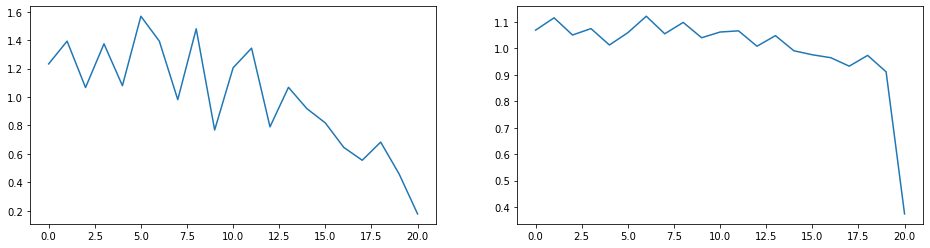

In [240]:
guy=e[6]
ax=imp.qax(2)
#ax[0].plot(guy[:,0], guy[:,5] / np.mean(guy[:,5])) # blue: gaussian height
ax[0].plot(guy[:,0], guy[:,10]/ np.mean(guy[:,10]))# orange: gaussian integration
ax[1].plot(guy[:,0], guy[:,9]/ np.mean(guy[:,9])) # right: volume integration

In [235]:
imp.viewer(test, 'ctzxy')

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

In [242]:
sc = test[1,0]

In [245]:
imp.viewer(sc,'zxy',12)

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/bin/imagep.py:903: RuntimeWarning: divide by zero encountered in double_scalars
  n-dimensional integer labelmask


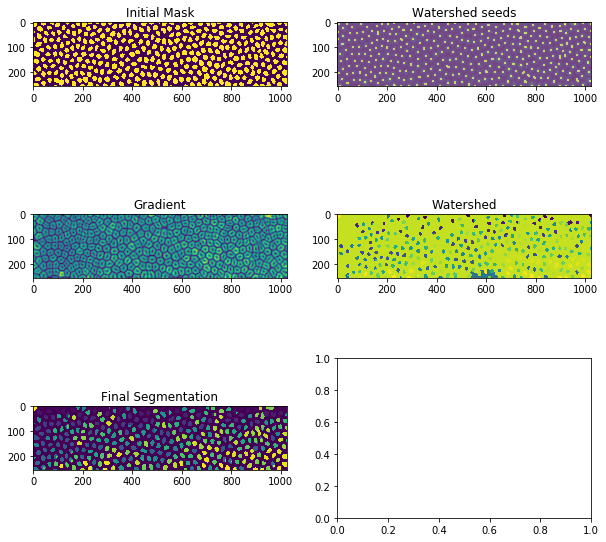

In [382]:
reload(imp)
nuc=imp.segment_nuclei3D_5(sc, seed_window=(20,30,30), circularity_min=0.65, size_min=0, size_max=5e4, sigma_dog_small=5, sigma_dog_big=15, erosion_length=2, dilation_length=2, display=True)

In [335]:
imp.viewer(nuc, 'zxy', 12)

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

In [337]:
imp.viewer(sc,'zxy',12)

interactive(children=(Dropdown(description='Color', index=8, options=('magma', 'Greens', 'plasma', 'gray_r', '…

In [253]:
from skimage.filters.thresholding import threshold_li, threshold_otsu
t = threshold_otsu(smooth)

In [2]:
c = czifile.imread('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/data/EVE_D11-14.czi')
c = np.squeeze(c)
c = np.swapaxes(c,1,0)

In [77]:
############################################################################
def relabel_labelmask(labelmask):
    """Relabel labelmask to set background to 0 and object IDs to be linearly 
    ascending from 1
    
    Args:
        labelmask: ndarray
            N-dimensional labelmask.
    
    Returns:
        labelmask: ndarray
            Labelmask of same shape as input, with the largest object's (
            background) ID set to 0 and all other objects labeled 1..n
    
    """
    mask = np.copy(labelmask)
    # Get all object labels and their counts.
    labels, counts = np.unique(mask, return_counts=True)
    # Get the indexes of sorted counts, descending.
    ordered_indexes = np.argsort(counts)[::-1]
    # Set largest object as background (ID=0).
    background_label = labels[ordered_indexes[0]]
    mask[mask == background_label] = 0
    # Renumber the rest of the objects 1..n.
    obj_num=1
    for n in ordered_indexes[1:]:
        old_label = labels[n]
        mask[labelmask == old_label] = obj_num
        obj_num = obj_num + 1
    return mask

In [82]:
#labelmask = segment_nuclei3D_monolayer(c[1,5], min_seed_dist=20, size_max=3000)
imp.viewer(labelmask,'xy',14)

interactive(children=(Dropdown(description='Color', index=4, options=('gray', 'inferno', 'Reds', 'magma', 'vir…

In [14]:
reload(imp)
mask4d = imp.segment_nuclei4D(c[1,0:5], imp.segment_nuclei3D_monolayer, imp.update_labels, min_seed_dist=15, size_max=1000)
#imp.viewer(mask4d, 'txy',14)

1
2
3
4


In [92]:
from imagep import labelmask_apply_morphology, imfill, peak_local_max_nD, gradient_nD, find_background_point, labelmask_filter_objsize
from skimage.segmentation import flood_fill, watershed
from skimage.filters.thresholding import threshold_li, threshold_otsu
reload(imp)

############################################################################
def segment_nuclei3D_monolayer(stack, sigma1=3, sigma_dog_big=15, 
        sigma_dog_small=5, seed_window=(30,30), min_seed_dist=25, 
        dilation_length=5, size_min=0, size_max=np.inf):
    """Segment nuclei from confocal nuclear monolayers
    
    Segment nuclei from nuclear monolayers, such as standard MS2 confocal
    stacks. Monolayers don't generally require 3D segmentation, so this
    function uses the max projection in Z to define the domain of each 
    nucleus in XY. 
    
    Args:
        stack: ndarray
            3D image stack of dimensions [z, x, y].
        sigma1: int
            Sigma for Gaussian smoothing used to make gradient input to watershed
        sigma_dog_small: int
            Smaller sigma for DoG filter used to create initial mask
        sigma_dog_big: int
            Larger sigma for DoG filter used to create initial mask
        seed_window: tuple of three ints
            Size in [z, x, y] for window for determining local maxes in distance
            transform. Generally want size to be ~ size of nuclei.
        min_seed_dist: numeric
            The minimum euclidean distance (in pixels) allowed between watershed
            seeds. Typically set as ~the diameter of the nuclei.
        size_min: int
            Minimum size, in pixels, of objects to retain
        size_max: int
            Maximum size, in pixels, of objects to retain
        dilation_length: int
            Size in x and y of structuring element for dilating objects after
            final segmentation.
        
    Returns:
        labelmask: ndarray
            2D labelmask of nuclei.
    """
    # Make max projection on Z.
    maxp = stack.max(axis=0)
    # Filter with DoG to make nuclei into blobs.
    dog = imp.dog_filter(maxp, sigma_dog_small, sigma_dog_big)
    # Get threshold, use thresh to make initial mask and fill holes.
    t = threshold_otsu(dog)
    mask = np.where(dog > t, 1, 0)
    mask = imfill(mask, find_background_point(mask))
    # Perform distance transform, find local maxima for watershed seeds.
    dist = ndi.distance_transform_edt(mask)
    seeds, _ = peak_local_max_nD(dist, size=seed_window, min_dist=min_seed_dist)
    # Smooth image and take gradient, use as input for watershed.
    im_smooth = ndi.filters.gaussian_filter(maxp, sigma=sigma1)
    grad = gradient_nD(im_smooth)
    ws = watershed(grad, seeds.astype(int))
    # Filter object size, relabel to set background to 0.
    labelmask = labelmask_filter_objsize(ws, size_min, size_max)
    labelmask = relabel_labelmask(labelmask)
    # Dilate segmented nuclei.
    labelmask = labelmask_apply_morphology(labelmask, 
                    mfunc=ndi.morphology.binary_dilation, 
                    struct=np.ones((dilation_length, dilation_length)), 
                    expand_size=(dilation_length + 1, dilation_length + 1))
    
    return labelmask

labelmask = segment_nuclei3D_monolayer(c[1,4], min_seed_dist=20, size_max=3000)
imp.viewer([labelmask.astype('bool')],'xy', 20)

interactive(children=(Dropdown(description='Color', index=4, options=('gray', 'inferno', 'Reds', 'magma', 'vir…

In [152]:
from scipy.spatial import distance
def peak_local_max_nD(img, size=(70,100,100), min_dist=0):
    """Find local maxima in an N-dimensional image.
    
    Generalizes scikit's peak_local_max function to three (or more) 
    dimensions. Finds local maxima pixels within supplied window, determines
    centroids for connected pixels, and returns a mask of these centroid
    positions and a list of them.
    
    Suggested usage: finding seed points for watershed segmentation from 
    distance transform. It is necessary because there are often multiple
    pixels with the same distance value, leaving little clusters of connected
    pixels.
    
    Args:
        img: ndarray
            N-dimensional image stack
        size: tuple of ints
            Size of the window for finding local maxima. The sizes are the
            dimensions of the filter used to search for maxima. So a size
            of (100, 100) will use a square with side lengths of 100 pixels.
            Generally, you want the size dimensions to match the dimensions
            of the objects you're searching for.
    
    Returns:
        tuple: (local_peak_mask, local_peaks)
        local_peak_mask: ndarray
            A labelmask with dimensions equal to img of single labeled 
            pixels representing local maxima.
        local_peaks: list of tuples
            Coordinates of pixels masked in local_peak_mask  
    """
    def has_neighbor(peak, peak_list, min_dist):
        """Find whether a peak already exists within minimum distance of this peak"""
        for testpeak in peak_list:
            if (distance.euclidean(peak, testpeak) < min_dist):
                return True
        return False
    # Find pixels that represent local maxima. Produces clusters of connected
    # pixels at the centers of objects.
    maxes = local_max(img, size)
    # Connect these pixels in a labelmask.
    conn_comp, info = ndi.label(maxes)
    # Get the centroids of each local max object, update mask and list.
    local_peak_mask = np.zeros_like(img)
    local_peaks = []
    peak_num=1
    for id_ in np.unique(conn_comp)[1:]:
        centroid = get_object_centroid(conn_comp, id_)
        if (not has_neighbor(centroid, local_peaks, min_dist)):
            local_peak_mask[centroid] = peak_num
            local_peaks.append(centroid)
            peak_num = peak_num + 1
    return local_peak_mask, local_peaks

In [61]:
imp.viewer(mask4d,'txy')

interactive(children=(Dropdown(description='Color', index=4, options=('gray', 'inferno', 'Reds', 'magma', 'vir…

In [114]:
reload(imp)
x=imp.update_labels(m1,m2)
#imp.viewer(x,'xy')

In [52]:
imp.viewer(x,'xy')

interactive(children=(Dropdown(description='Color', index=4, options=('gray', 'inferno', 'Reds', 'magma', 'vir…

Whew—that was an enormous hassle. So many stupid bugs and problems. Guess it's good to work them out. I'm not thrilled that the update_labels function drops nuclei permanently. I wonder if I can dress it up like the MS2 spot tracker to allow skipped frames...

In [2]:
c = czifile.imread('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/data/EVE_D11-14.czi')
c = np.squeeze(c)
c = np.swapaxes(c,1,0)

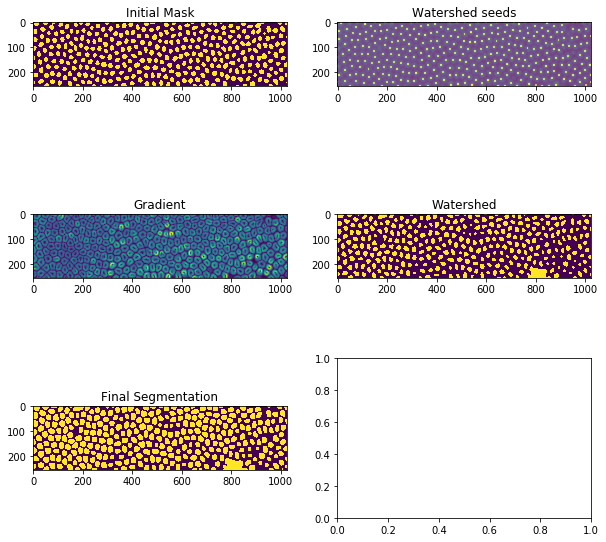

In [108]:
reload(imp)
labelmask = imp.segment_nuclei3D_monolayer(c[1,20],sigma1=4, min_seed_dist=13, size_max=5000, display=True)
#imp.viewer([labelmask.astype('bool')],'xy', 20)
#imp.viewer(c[1,10].max(axis=0),'ctzxy')

In [78]:
imp.viewer(c[1,10].max(axis=0),'xy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [97]:
mask4d = imp.segment_nuclei4D(c[1,], imp.segment_nuclei3D_monolayer, imp.update_labels, min_seed_dist=20, size_max=1000)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [98]:
imp.viewer(mask4d.astype('bool'),'txy',20)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [73]:
imp.viewer(c[1],'tzxy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [142]:
mask18 = imp.segment_nuclei3D_monolayer(c[1,18],sigma1=4, min_seed_dist=13, size_max=5000)

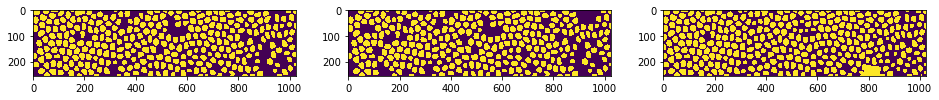

In [141]:
ax=imp.qax(3)
ax[0].imshow(skip20.astype('bool'))
ax[1].imshow(skip2.astype('bool'))
ax[2].imshow(mask20.astype('bool'))

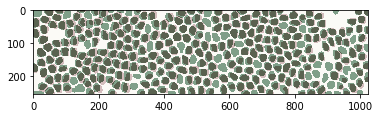

In [121]:
#ax=imp.qax(1)
plt.imshow(mask4d[20].astype('bool'),alpha=0.5,cmap="Reds")
plt.imshow(mask4d[10].astype('bool'),alpha=0.5,cmap="Greens")

In [70]:
imp.viewer([mask4d[2].astype('bool'), mask4d[3].astype('bool')],'xy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [174]:
#reload(imp)
from imagep import update_labels
maskstack = mask4d
newmask = mask18
max_frames_skipped=19
############################################################################
def update_labels_withmemory(maskstack, newmask, max_frames_skipped=2, 
                             update_func=update_labels):
    """Match labels in a labelmask to masks from previous frames
    
    Take a mask and a stack of masks, walk backward in time looking for
    segmented nuclei in previous frames that correspond to nuclei in the
    new frame. Default is to use update_labels function to do comparison
    of two masks, but this can be changed.
    
    Note: Written with adding 3d masks to 4d stacks, but works for 3d-
    2d.
    
    Args:
        maskstack:
            4D labelmask [t,z,x,y] of nuclei at previous time frames
        newmask:
            3D labelmask [z,x,y] of new frame
        max_frames_skipped: int
            Maximum number of frames that can be "skipped" to find a nucleus
            to connect to. Compensates for errors in segmentation that cause
            nuclei to sometimes drop from frames. e.g., for a value of 1, 
            function will search for a connected nucleus in the last frame 
            and, if unsuccessful, in the second-to-last frame.
        update_func: function
            Function that takes two label masks, updates labels in the second
            based on matches in the first. Default is to use update_labels.
    
    Returns:
        updated_mask: ndarray
            3D labelmask of same shape as newmask with object labels updated
            to match previous frames.       
    """
    # Initialize blank mask.
    updated_mask = np.zeros_like(newmask)
    # Step backwards through frames, limited by available frames and max
    # allowable skipped frames.
    for i in range(1, min(max_frames_skipped + 2, maskstack.shape[0] + 1)):
        # Update new mask with connections to earlier frame.
        mask_updated_thisframe = update_func(maskstack[-i], newmask)
        # For positions that do not have an object in the currently updated mask
        # but do have an object in this frame's update, add object pixels.
        updated_mask = np.where((updated_mask == 0) & (mask_updated_thisframe != 0), 
                                mask_updated_thisframe, updated_mask)
    return updated_mask
#skip20 = update_labels_withmemory(mask4d, mask20, 20)

In [159]:
from functools import partial

def segment_nuclei4D(stack, seg_func, update_func=update_labels_withmemory, max_frames_skipped=2, **kwargs):
    """Segment nuclei in a 4D image stack (expect lattice data).
    
    A wrapper for two supplied functions: one function that performs
    segmentation of a 3D image stack and a second function that connects
    segmentation outputs for a new frame with previous frames, identifying
    shared objects and harmonizing their labels. The 3D segmentation function
    is iteratively called on all frames, and the label update function is
    used to connect objects through time.
    
    Note: Though descriptions are written for segmentation of frames of 3D
    movies, this function is compatible with 2D labelmasks as well. 2D masks
    will be combined into 3D (presumably [t,x,y]) stacks.
    
    Args:
        stack: ndarray
            4D image stack of dimensions [t, z, x, y].
        seg_func: function
            Function that performs segmentation on 3D image stacks. Must take 
            as arguments a 3D image stack and optional keyword arguments.
        update_func: function
            Function that compares new labelmask to a stack of masks from 
            previous frames. 
        max_frames_skipped: int
            Maximum number of frames that can be "skipped" to find a nucleus
            to connect to. Compensates for errors in segmentation that cause
            nuclei to sometimes drop from frames. e.g., for a value of 1, 
            function will search for a connected nucleus in the last frame 
            and, if unsuccessful, in the second-to-last frame.
        **kwargs: optional key-word arguments
            Keyword arguments to supply to segmentation function.
    
    Returns:
        labelmask: ndarray
            4D labelmask of dimensions [t, z, x, y] with segmented objects.
    
    Example usage:
        labelmask = segment_nuclei4D(im_stack, segment_nuclei3D, update_labels,
            sigma=5, percentile=90)
    """
    # Create partial form of segmentation function with supplied kwargs.
    seg_func_p = partial(seg_func, **kwargs)
    # Segment first frame, add 4th axis in 0 position.
    labelmask = seg_func_p(stack[0])
    labelstack = np.expand_dims(labelmask, axis=0) 

    # Segment subsequent frames, update labels, build 4D labelmask.
    for t in range(1, stack.shape[0]):
        print(t)
        mask = seg_func_p(stack[t])
        mask_updated = update_func(labelstack, mask, max_frames_skipped)
        mask_updated = np.expand_dims(mask_updated, axis=0)
        labelstack = np.concatenate((labelstack, mask_updated), axis=0)

    return labelstack

In [196]:
reload(imp)
mask4d_nopreserve = imp.segment_nuclei4D(c[1,0:4], imp.segment_nuclei3D_monolayer, imp.update_labels_withmemory, 5, sigma1=4, min_seed_dist=13, size_max=5000)

1
2
3


In [195]:
imp.viewer(mask4d_preserve,'txy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [197]:
imp.viewer(mask4d_nopreserve,'txy')

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [163]:
for i in range(1,2):
    print(i)

1


In [184]:
test = labelmask * 2
np.max([labelmask, test])

682

## Where the fuck are we

Well, that was a long diversion. I think nuclear segmentation for monolayers is now in decent shape. An advantage of this approach is it should work seamlessly across z-changes (because it's 2D). It seems that MS2 spot segmentation was pretty effective, but I will go through it now to make sure spot detection for confocal data actually works.

In [207]:
imp.viewer(c[0].max(axis=1),'txy', 20)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [231]:
imp.viewer(test.max(axis=0), 'xy', 15)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [235]:
test = c[0,0]
dog=imp.dog_filter(test,0.5,5)
imp.viewer(dog.max(axis=0), 'xy', 15)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [236]:
dog=imp.dog_filter(test,0.5,4)
imp.viewer(dog.max(axis=0), 'xy', 15)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

I think the 0.5-4 spread for the DoG filter looks great. How about background subtract...

In [238]:
bg = ndi.filters.minimum_filter(dog, 4)
dog_bs = dog - bg
imp.viewer(dog_bs.max(axis=0), 'xy',15)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

This all looks totally fine. I think these base settings are perfect.

In [239]:
nucmask=mask4d_nopreserve = imp.segment_nuclei4D(c[1], imp.segment_nuclei3D_monolayer, imp.update_labels_withmemory, 5, sigma1=4, min_seed_dist=13, size_max=5000)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [258]:
reload(imp)
spot_data = imp.ms2_segment_stack(c, nucmask=np.ones_like(c[1]), peak_window_size=(20,15,15), h_stringency=0, xy_max_width=10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [259]:
from imagep import box_spots, viewer
def quickview_ms2(stack, spot_data, channel=0):
    substack = stack[channel]
    boxes = box_spots(substack, spot_data, halfwidth_xy=6, linewidth=2)
    viewer(boxes.max(axis=1), 'txy', 15)

quickview_ms2(c, spot_data)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [387]:
from imagep import dog_filter, peak_local_max_nD
from fitting import fitgaussian3d
speed_enhance=0.7
def segMS2_3dstack(stack, peak_window_size=(70,50,50), sigma_small=0.5, 
                   sigma_big=4, bg_radius=4, fitwindow_rad_xy=5, 
                   fitwindow_rad_z=9, h_stringency=1, 
                   xy_max_width=15):  
    """Segment MS2 spots from a 3D stack, fit them with 3D gaussian
    
    Alrigthm: bandbass filter -> background subtraction -> find local maxima
    -> fit gaussian to windows around maxima -> filter based on fit parameters
    -> label and return.
    
    Args:
        stack: ndarray
            3D image stack containing MS2 spots
        peak_window_size: tuple of three ints
            Size in [z,x,y] of window used to find local maxima. Typically
            set to the approximage dimensions of nuclei.
        sigma_small: numeric
            Lower sigma for difference-of-gaussians bandpass filter
        sigma_small: numeric
            Upper sigma for difference-of-gaussians bandpass filter
        bg_radius: int
            Radius for minimum filter used for background subtraction
        fitwindow_rad_xy: int
            Radius in pixels in the xy-dimension of the window around local
            maxima peaks within which to do gaussian fitting.
        fitwindow_rad_z: int
            Radius in pixels in the z-dimension of the window around local
            maxima peaks within which to do gaussian fitting.
        h_stringency: float
            Sets the filter for the minimum peak height of the gaussian fit
            for a spot to be retained, expressed as standard deviations
            above the mean pixel value for the entire 3D stack.
        xy_max_width: int
            Maximum width in xy-dimension used for filtering gaussian fits.
    
    Returns:
        spot_data: dict of ndarrays
            Data for detected spots. Dict keys are unique spot IDs (integers),
            array entries are 0: z-coordinate, 1: x-coordinate, 2: y-coordinate, 
            3: gaussian fit height, 4: gaussian fit z-width, 5: gaussian fit 
            x-width, 6: gaussian fit y-width.
    """
    def get_fitwindow(data, peak, xy_rad=5, z_rad=9):
        """Retrieve section of image stack corresponding to given
        window around a point"""
        zmin = max(0,peak[0] - z_rad)
        zmax = min(data.shape[0] - 1, peak[0] + z_rad)
        xmin = max(0,peak[1] - xy_rad)
        xmax = min(data.shape[1] - 1, peak[1] + xy_rad)
        ymin = max(0,peak[2] - xy_rad)
        ymax = min(data.shape[2] - 1, peak[2] + xy_rad)
        # Get adjustments in each direction — value to subtract from relative
        # coordinates to center them at 0,0,0 in the window center.
        z_adj, x_adj, y_adj = int((zmax-zmin)/2), int((xmax-xmin)/2), int((ymax-ymin)/2)
        return data[zmin:(zmax+1), xmin:(xmax+1), ymin:(ymax+1)], z_adj, x_adj, y_adj
    
    def relabel(peak_ids, oldparams, mask):
        """Renumber labelmask and corresponding fit parameters
        Set background as 0, objects in order 1...end.
        """
        spot_data = {}
        peak_num = 1
        for peak in peak_ids:
            #coords = np.where(mask == peak)
            paramsnew = oldparams[peak-1,:] # object 1 will be fitparams row 0
            # Rearrange params from fit function so coordinates lead.
            spot_data[peak_num] = paramsnew[[1,2,3,0,4,5,6]]
            peak_num = peak_num + 1
        return spot_data

    def clamp(n, minn, maxn):
        """Bound a number between two constants"""
        return max(min(maxn, n), minn)
    
    # Filter and background subtract image.
    print('filtering')
    dog = dog_filter(stack, sigma_small, sigma_big)
    bg = ndi.filters.minimum_filter(dog, bg_radius)
    dog_bs = dog - bg
    # Make a labelmask corresponding to local maxima peaks.
    print('finding local peaks')
    mask, peaks = peak_local_max_nD(dog_bs, peak_window_size)
    
    # Fit 3D gaussian in window surrounding each local maximum.
    fitparams = np.ndarray((0,7))
    print('fitting gaussians imnew')
    for peak in peaks:
        fitwindow, z_adj, x_adj, y_adj = get_fitwindow(stack, peak, fitwindow_rad_xy, 
                                            fitwindow_rad_z)
        norm_var = np.std(fitwindow) / np.mean(fitwindow)
        if (norm_var > speed_enhance):
            opt = fitgaussian3d(fitwindow)
            if opt.success:
                peak_fitparams = opt.x
                # Move center coordinates to match center of gaussian fit, ensure they're within image.
                peak_fitparams[1] = clamp(int(peak[0] + peak_fitparams[1] - z_adj), 0, stack.shape[-3]-1)
                peak_fitparams[2] = clamp(int(peak[1] + peak_fitparams[2] - x_adj), 0, stack.shape[-2]-1)
                peak_fitparams[3] = clamp(int(peak[2] + peak_fitparams[3] - y_adj), 0, stack.shape[-1]-1)
                fitparams = np.vstack((fitparams, opt.x))
            # If fit fails, add dummy entry for spot.
            else:
                fitparams = np.vstack((fitparams, np.array([0,0,0,0,1e6,1e6,1e6])))
        else:
            fitparams = np.vstack((fitparams, np.array([0,0,0,0,1e6,1e6,1e6])))
    print('done fitting')
    # Find threshold for gaussian height (intensity for 3D).
    mean_ = np.mean(stack)
    std = np.std(stack)
    t = mean_ + (std * h_stringency)
    # Filter peaks based on guassian fit parameters.
    peak_ids = np.unique(mask)[1:]
    # fitparams columns: 0: height, 5: x_width, 6: y_width
    trupeaks = peak_ids[(fitparams[:,0] > t) 
                        & (np.mean(fitparams[:,5:6], axis=1) < xy_max_width)]
    spot_data = relabel(trupeaks, fitparams, mask)
    return spot_data

In [341]:
test=c[0,0,:,50:200,180:600]
reload(imp)
a = segMS2_3dstack(test,peak_window_size=(30,15,15), xy_max_width=1e6, h_stringency=-1000)

filtering
finding local peaks
fitting gaussians imnew
done fitting


In [388]:
test5d = c[:,0:2,:,50:200,180:600]
b = imp.ms2_segment_stack(test5d, nucmask = np.ones_like(test5d[1]),seg_func=segMS2_3dstack,peak_window_size=(30,15,15), xy_max_width=1e6, h_stringency=-1000)

filtering
finding local peaks
fitting gaussians imnew
done fitting
1
filtering
finding local peaks
fitting gaussians imnew
done fitting


In [389]:
#-30: 384
#0: 384
#0.2: 384
#0.3: 384
#0.4: 70
#0.7: 22
len(b.keys())

22

In [368]:
b

{1: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06],
        [1.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 2: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 3: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 4: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 5: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 6: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 7: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 8: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 9: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+06, 1.e+06,
         1.e+06]]),
 10: array([[0.e+00, 1.e+00, 0.e+00, 0.e+00, 

In [358]:
quickview_ms2(test5d, b)

interactive(children=(Dropdown(description='Color', options=('viridis', 'cividis', 'gray', 'magma', 'inferno',…

In [323]:
b=np.ndarray((1,8))
for r in a:
    b=np.vstack((b,[a[r]]))

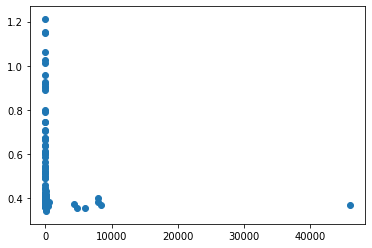

In [325]:
plt.scatter(b[:,5],b[:,7])

In [297]:
a

{1: array([   0.        ,    2.        ,  197.        , 1883.78918036,
          15.61027163,   12.31554018,   31.87158633]),
 2: array([   0.        ,    2.        ,  362.        , 1965.82049669,
          13.14210407,   29.09729263,   64.01869425]),
 3: array([   0.        ,    3.        ,  150.        , 1923.30506616,
          18.95507861,   25.07187791,    8.63912693]),
 4: array([   0.        ,    6.        ,   78.        , 2058.43457307,
          14.56774452,   27.66499726,   32.78206093]),
 5: array([   0.        ,    9.        ,  132.        , 1947.95436255,
          14.86326691,   22.24450984,   26.71553457]),
 6: array([0.00000000e+00, 2.00000000e+00, 3.25000000e+02, 2.07073240e+03,
        1.47293164e+01, 2.52799363e+01, 1.22109152e+01]),
 7: array([   0.        ,   15.        ,  278.        , 2001.94601777,
          12.48942644,   20.09751264,   16.60476797]),
 8: array([   0.        ,   27.        ,  181.        , 1901.69381819,
          14.22411562,   19.02085998,   

In [298]:
np.append(a[1],10)

array([   0.        ,    2.        ,  197.        , 1883.78918036,
         15.61027163,   12.31554018,   31.87158633,   10.        ])

OK, so I screwed around with this for a minute, trying to use a measure of the variance within the fit window as pre-screening for whether to attempt a fit. It didn't work at all. As soon as I started excluding windows, I started excluding real spots. I also don't think looking at pixel intensities (look for evidence of peak using max values or something) is a good idea as it will just miss faint spots. I think that the gaussian fit is probably the best way to find spots, and that my current strategy, while computationally intensive, is a good one. 

OK so this notebook turned into half analyzing MS2 traces from lattice data and half adapting segmentation to confocal MS2 data. I think this actually makes some sense — get some experience looking at confocal traces since those movies are better-behaved and the data better characterized. From there, I can go back adn look at lattice movies. Seems like a decent plan, anyway.

Fin.

In [1]:
spot_data

NameError: name 'spot_data' is not defined